In [ ]:
# NOW create model and evaluate base on manual dataset which is cinema2.csv  thisb is my manual dataset made by me.

In [ ]:
# understanding data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
#!pip install streamlit



  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13479 sha256=599ac3403108a87a04a98d99ea3b5d9d0d635a70281413ceb3363908af5ca418
  Stored in directory: c:\users\rakshita\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1


In [15]:
df = pd.read_csv('cinema2.csv')

In [16]:
df

,movie_reviews,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,movie_name,Unnamed: 12,Unnamed: 13,Unnamed: 14,label
0,Extremely well-done!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,littlemankazoo,NaN,NaN,NaN,1
1,"Best Yet of the ""Computer-Screen"" Movies",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jared_Andrews,NaN,NaN,NaN,1
2,Excellent Actor And Actrees In This Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ymyuseda,NaN,NaN,NaN,1
3,Really good Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,greenops-43606,NaN,NaN,NaN,1
4,"Compelling story, engaging presentation",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jg_1977,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,"I hate Harry Potter, that daniel wotshisface n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,harry potter,NaN,NaN,NaN,0
2752,This quiz sucks and Harry Potter sucks ok bye..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,harry potter,NaN,NaN,NaN,0
2753,"I hate Harry Potter, it's retarted, gay and st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,harry potter,NaN,NaN,NaN,0
2754,"Is it just me, or does Harry Potter suck?...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,harry potter,NaN,NaN,NaN,0


In [17]:
# droppin col having missing values

df = df.dropna(axis=1)
print(df)

                                          movie_reviews      movie_name  label
0                                  Extremely well-done!  littlemankazoo      1
1              Best Yet of the "Computer-Screen" Movies   Jared_Andrews      1
2              Excellent Actor And Actrees In This Film        ymyuseda      1
3                                     Really good Movie  greenops-43606      1
4               Compelling story, engaging presentation         jg_1977      1
...                                                 ...             ...    ...
2751  I hate Harry Potter, that daniel wotshisface n...    harry potter      0
2752    This quiz sucks and Harry Potter sucks ok bye..    harry potter      0
2753  I hate Harry Potter, it's retarted, gay and st...    harry potter      0
2754       Is it just me, or does Harry Potter suck?...    harry potter      0
2755  Always knows what I want, not guy crazy, hates...    harry potter      0

[2756 rows x 3 columns]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie_reviews  2756 non-null   object
 1   movie_name     2756 non-null   object
 2   label          2756 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 64.7+ KB


In [19]:
df.describe()

,label
count,2756.000000
mean,0.847605
std,0.359468
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
df['movie_reviews']

0                                    Extremely well-done!
1                Best Yet of the "Computer-Screen" Movies
2                Excellent Actor And Actrees In This Film
3                                       Really good Movie
4                 Compelling story, engaging presentation
                              ...                        
2751    I hate Harry Potter, that daniel wotshisface n...
2752      This quiz sucks and Harry Potter sucks ok bye..
2753    I hate Harry Potter, it's retarted, gay and st...
2754         Is it just me, or does Harry Potter suck?...
2755    Always knows what I want, not guy crazy, hates...
Name: movie_reviews, Length: 2756, dtype: object

In [21]:
#EXPLORE DATASET

<AxesSubplot:>

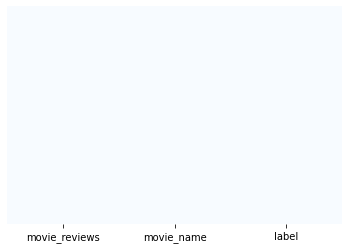

In [22]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

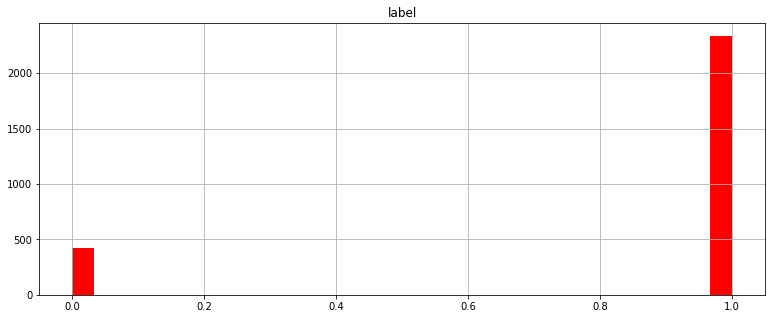

In [23]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

In [24]:
#Plot similar figure using seaborn countplot

C:\Users\Rakshita\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

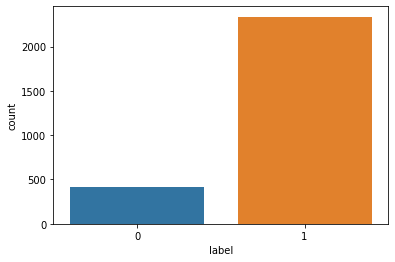

In [25]:
sns.countplot(df['label'], label = "Count") 

In [26]:
# Let's get the length of the msg
df['length'] = df['movie_reviews'].apply(len)

<ipython-input-26-596d6f69e792>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['movie_reviews'].apply(len)


In [27]:
df

,movie_reviews,movie_name,label,length
0,Extremely well-done!,littlemankazoo,1,20
1,"Best Yet of the ""Computer-Screen"" Movies",Jared_Andrews,1,40
2,Excellent Actor And Actrees In This Film,ymyuseda,1,40
3,Really good Movie,greenops-43606,1,17
4,"Compelling story, engaging presentation",jg_1977,1,39
...,...,...,...,...
2751,"I hate Harry Potter, that daniel wotshisface n...",harry potter,0,68
2752,This quiz sucks and Harry Potter sucks ok bye..,harry potter,0,47
2753,"I hate Harry Potter, it's retarted, gay and st...",harry potter,0,84
2754,"Is it just me, or does Harry Potter suck?...",harry potter,0,44


<AxesSubplot:ylabel='Frequency'>

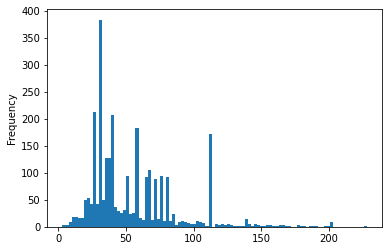

In [28]:
df['length'].plot(bins=100, kind='hist') 

In [29]:
df.describe()

,label,length
count,2756.000000,2756.000000
mean,0.847605,54.400581
std,0.359468,32.230577
min,0.000000,3.000000
25%,1.000000,32.000000
50%,1.000000,42.000000
75%,1.000000,70.250000
max,1.000000,228.000000


In [30]:
# PLOT THE WORDCLOUD

In [31]:
len(df)

2756

In [32]:
sentences = df['movie_reviews'].tolist()
len(sentences)                              # i just checking functions

2756

In [33]:
sentences_as_one_string =" ".join(sentences)

In [34]:
sentences_as_one_string

'Extremely well-done! Best Yet of the "Computer-Screen" Movies Excellent Actor And Actrees In This Film Really good Movie Compelling story, engaging presentation Highly original and compelling thriller Way better than expected! An excellent film, despite the distracting direction. WOW Don\'t judge a movie by a crew member name i loved the movie An Engaging Mystery In A Unique Format A crime procedural with some pioneering technique Much better than expected Unique and gripping intriguing Social Media for Sherlock Holmes Pretty Good Thriller Greaf suspense! Compelling An unique movie Indie goes mainstream Searching for a good movie...here it is "Searching" offers new thrills with solid storytelling behind it Clever, Moving, Gripping Emotional, Real, Captivating A interesting way to tell an engrossing story Interesting film Every parent\'s nightmare How much do we really know others? Even if they are our own flesh and blood? this movie makes you crazy even though it only displays the mon

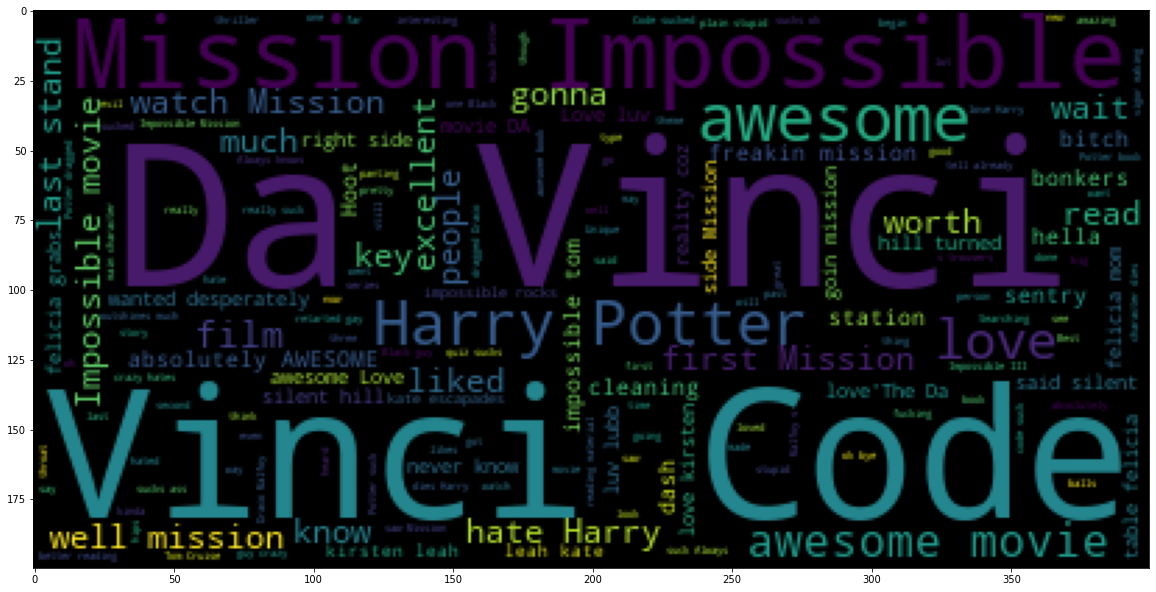

In [35]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [36]:
#PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT and Applying model

In [37]:

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rakshita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stopset = set(stopwords.words('english'))

In [39]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)


In [40]:
X = vectorizer.fit_transform(df.movie_reviews)
y = df.label
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [43]:
accuracy_score(y_test,clf.predict(X_test))*100

93.65942028985508

In [44]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [45]:
accuracy_score(y_test,clf.predict(X_test))*100

97.64492753623189

In [46]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [47]:
######## this is my nlp model

In [48]:
from keras.models import load_model

Using TensorFlow backend.


In [49]:
message="yeah-I hate Harry Potter, I'll gladly play Dungeons and Dragons, but I'll beat up anyone who asks me to watch a HP movie:)"

In [50]:
filename='nlp_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
myprediction = loaded_model.predict(vectorizer.transform([message]))

In [52]:
myprediction

array([0], dtype=int64)

In [53]:
if myprediction[0]==0:
    print('negative sentence')
else:
    print('positive sentence')

negative sentence
